In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage
import cv2

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
from mrcnn.visualize import save_image, return_image

from samples.plate import plate1

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "trained_model")


PLATE_WEIGHTS_PATH = os.path.join(ROOT_DIR, "/trained_model/mask_rcnn_plate_0010.h5")  # TODO: update this path

C:\Users\iliac\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


sys path:  ['', 'C:\\Program Files\\Python36', 'C:\\TensorFlow\\models', 'C:\\TensorFlow\\models\\research', 'C:\\TensorFlow\\models\\research\\slim', 'C:\\TensorFlow\\models\\research\\object_detection', 'C:\\Users\\iliac\\Documents\\Machine Learning\\FlaskTest\\Cars', 'C:\\Users\\iliac\\Anaconda3\\python36.zip', 'C:\\Users\\iliac\\Anaconda3\\DLLs', 'C:\\Users\\iliac\\Anaconda3\\lib', 'C:\\Users\\iliac\\Anaconda3', 'C:\\Users\\iliac\\Anaconda3\\lib\\site-packages', 'C:\\Users\\iliac\\Anaconda3\\lib\\site-packages\\pip-18.0-py3.6.egg', 'C:\\Users\\iliac\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\iliac\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\iliac\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\iliac\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\iliac\\.ipython', 'C:\\Users\\iliac\\Documents\\Machine Learning', 'C:\\Users\\iliac\\Documents\\Machine Learning\\FlaskTest']
os.path:  <module 'ntpath' from 'C:\\Users\\iliac\\Anaconda3\\li

In [2]:
config = plate1.PlateConfig()
#PLATE_DIR = os.path.join(ROOT_DIR, "datasets/plate")

In [3]:
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.8
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

In [4]:
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,config=config)

In [5]:
weights_path = 'C:/Users/iliac/Documents/Machine Learning/Mask/Mask_RCNN-master/trained_model/mask_rcnn_plate_0010.h5'
# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  C:/Users/iliac/Documents/Machine Learning/Mask/Mask_RCNN-master/trained_model/mask_rcnn_plate_0010.h5


Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


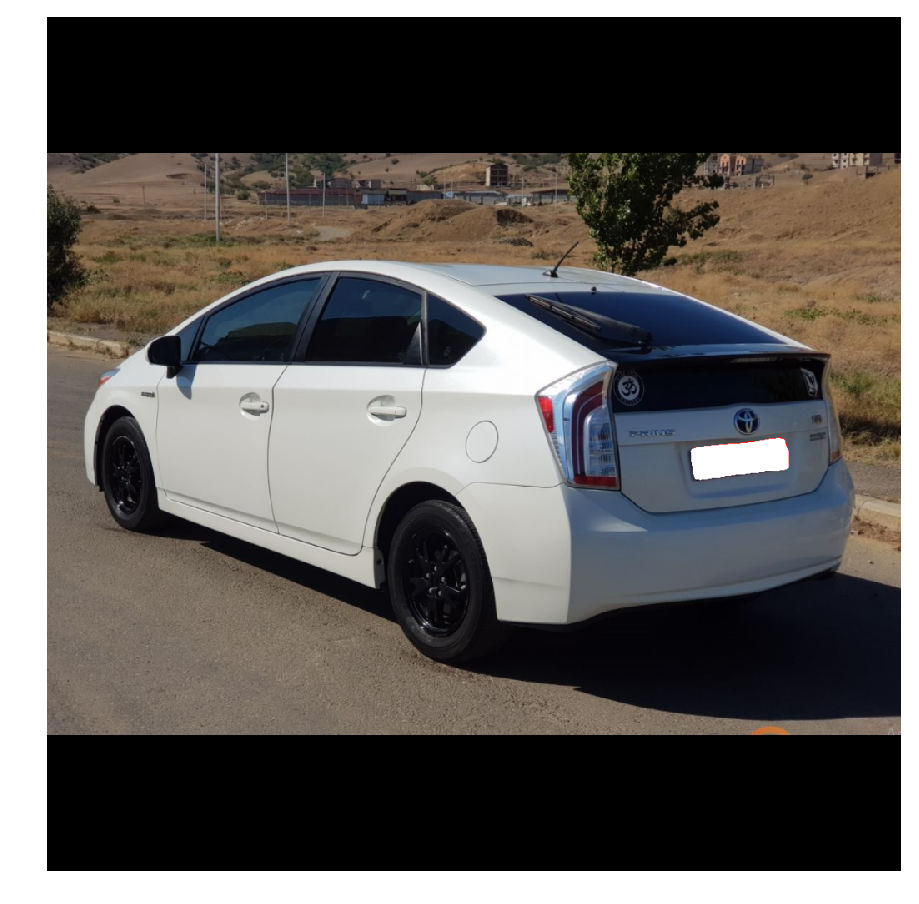

In [15]:
# Load a random image from the images folder
#file_names = next(os.walk(IMAGE_DIR))[2]

file_name = os.path.join('C:/Users/iliac/Desktop', 'capture8.png')
image = skimage.io.imread(file_name)

if len(image.shape) > 2 and image.shape[2] == 4:
    image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)

original_shape = image.shape
# Resize
image, window, scale, padding, _ = utils.resize_image(
    image, 
    min_dim=config.IMAGE_MIN_DIM, 
    max_dim=config.IMAGE_MAX_DIM,
    mode=config.IMAGE_RESIZE_MODE)
#mask = utils.resize_mask(mask, scale, padding)


# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0] 
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            ['BG','Plate'], r['scores'])

In [16]:
save_image(image, 'enter_image_name2', r['rois'], r['masks'], r['class_ids'], r['scores'], ['BG','Plate'], filter_classs_names=None,
               scores_thresh=0.1, save_dir=None, mode=0)

In [6]:
axali = return_image(image, 'enter_image_name', r['rois'], r['masks'], r['class_ids'], r['scores'], ['BG','Plate'], filter_classs_names=None,
               scores_thresh=0.1, save_dir=None, mode=0)


NameError: name 'image' is not defined

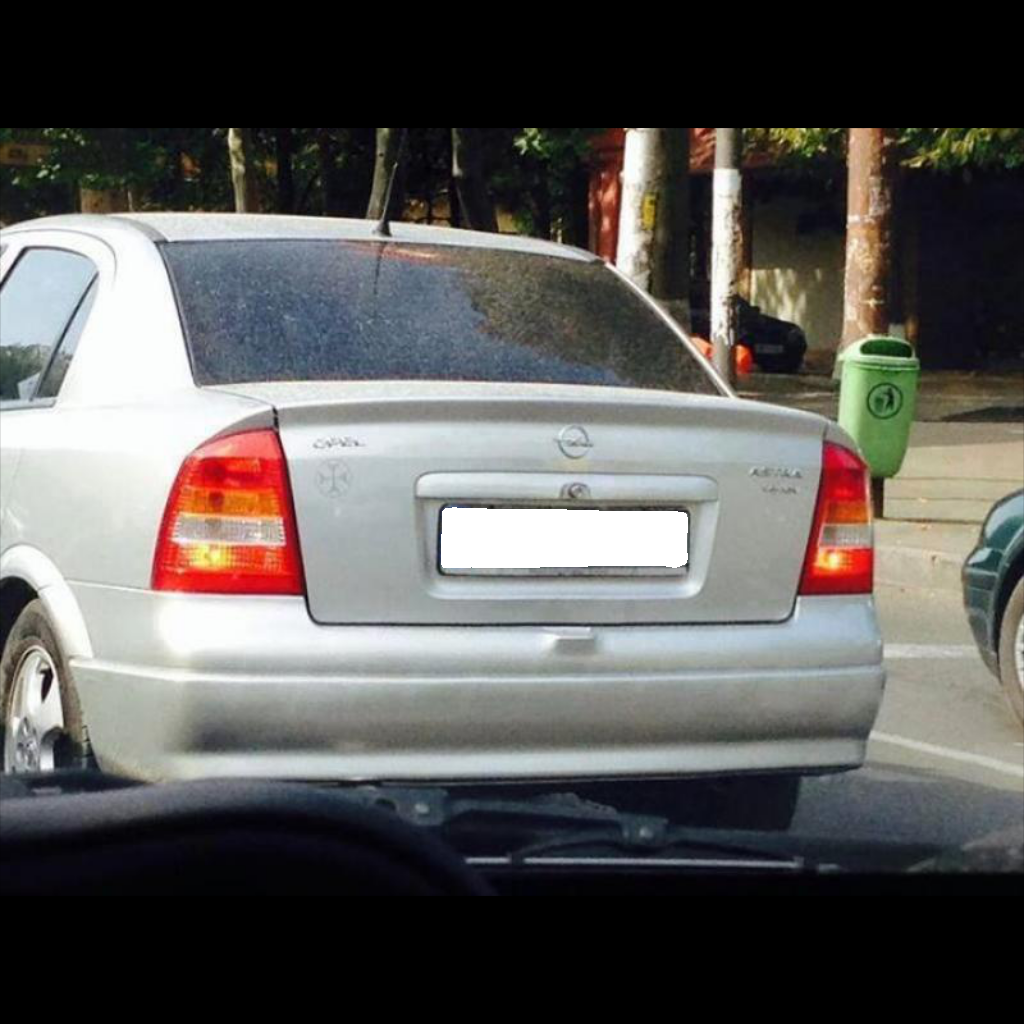

In [9]:
axali

In [ ]:
file_name1 = os.path.join('C:/Users/iliac/Desktop', 'satesto.png')
image1 = skimage.io.imread(file_name1)

In [4]:
img = skimage.io.imread('C:/Users/iliac/Desktop/satesto.png')

In [5]:
img.shape

(574, 700, 4)

In [ ]:
n,m,k = image1.shape[:3]
n,m,k

In [ ]:
result = image1.reshape(-1,n,m,3)

In [ ]:
result.shape

In [ ]:
new = image1[:, :, 1]

In [ ]:
new = image1[:][:][1]

In [ ]:
new = image1[:][:][2]

In [ ]:
new.shape

In [ ]:
image1.reshape(n,m,k-1).shape

In [ ]:
image1.shape

In [ ]:
mode_lis = [0,1,2,3]

In [ ]:
str(mode_lis)

In [ ]:
import colorsys
def random_colors(N, bright=True):
    """
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors

In [ ]:
colors = random_colors(50)

In [ ]:
colors

In [ ]:
plt.imshow(colors)

In [ ]:
len(image1.shape)

In [ ]:
image1.shape

In [ ]:
import cv2

In [ ]:
img = cv2.cvtColor(image1, cv2.COLOR_BGRA2BGR)

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

In [ ]:
plt.imshow(image1)

In [ ]:
os.path